# My supporting code (Jupyter notebook) for the homework assignment is in 
https://github.com/Geethik07/Statistical-Data-Mining-I/tree/main/HW3

In [1]:
#1a)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
set.seed(150)
df <- data.frame(replicate(25, rnorm(n = 1000)))

df %>%
    reduce(function(y, x) y + ifelse(runif(1) < 0.5,
                                     rnorm(1, mean = 5, sd = 1), 
                                     0)*x + rnorm(1000)) -> df$Y
summary(df)

       X1                 X2                 X3                 X4          
 Min.   :-3.10336   Min.   :-4.26439   Min.   :-2.95055   Min.   :-3.86384  
 1st Qu.:-0.69763   1st Qu.:-0.66084   1st Qu.:-0.64082   1st Qu.:-0.63110  
 Median :-0.06281   Median : 0.07410   Median : 0.06175   Median : 0.03185  
 Mean   :-0.03173   Mean   : 0.03254   Mean   : 0.03590   Mean   : 0.03474  
 3rd Qu.: 0.65249   3rd Qu.: 0.74917   3rd Qu.: 0.70251   3rd Qu.: 0.70578  
 Max.   : 2.71379   Max.   : 3.03586   Max.   : 3.41972   Max.   : 3.30378  
       X5                  X6                  X7           
 Min.   :-3.247475   Min.   :-3.562238   Min.   :-2.915472  
 1st Qu.:-0.699902   1st Qu.:-0.656122   1st Qu.:-0.674011  
 Median :-0.035461   Median : 0.032649   Median :-0.030054  
 Mean   :-0.001009   Mean   :-0.000381   Mean   :-0.006509  
 3rd Qu.: 0.703062   3rd Qu.: 0.683189   3rd Qu.: 0.705613  
 Max.   : 3.171178   Max.   : 3.652261   Max.   : 2.799213  
       X8                  X9     

In [3]:
set.seed(37)
p = 25
n = 1000
x = matrix(rnorm(n*p),n,p)
beta <- rnorm(p)
beta[1] <- 0
beta[3] <- 0
beta[9] <- 0
beta[12] <- 0
beta[18] <- 0
eps <- rnorm(p)

y <- x%*%beta + eps

summary(x)
summary(y)

       V1                V2                 V3                 V4          
 Min.   :-2.8613   Min.   :-3.28763   Min.   :-2.75134   Min.   :-2.94995  
 1st Qu.:-0.6961   1st Qu.:-0.59550   1st Qu.:-0.65133   1st Qu.:-0.71232  
 Median :-0.0339   Median : 0.06348   Median : 0.05314   Median :-0.01484  
 Mean   :-0.0184   Mean   : 0.03492   Mean   : 0.01326   Mean   : 0.05575  
 3rd Qu.: 0.6836   3rd Qu.: 0.69935   3rd Qu.: 0.68554   3rd Qu.: 0.80890  
 Max.   : 3.8147   Max.   : 3.17901   Max.   : 3.49375   Max.   : 3.32944  
       V5                 V6                  V7                 V8          
 Min.   :-3.13860   Min.   :-3.265187   Min.   :-2.98144   Min.   :-2.75869  
 1st Qu.:-0.63080   1st Qu.:-0.646058   1st Qu.:-0.75989   1st Qu.:-0.68434  
 Median :-0.01120   Median : 0.000693   Median :-0.05697   Median :-0.02769  
 Mean   : 0.01069   Mean   : 0.007317   Mean   :-0.07226   Mean   :-0.03049  
 3rd Qu.: 0.69042   3rd Qu.: 0.700008   3rd Qu.: 0.61733   3rd Qu.: 0.59923  


       V1          
 Min.   :-18.5662  
 1st Qu.: -3.9627  
 Median : -0.3683  
 Mean   : -0.3404  
 3rd Qu.:  3.1816  
 Max.   : 15.4384  

In [4]:
#1b)
#Splitting into training and test data
Train <-  sample(seq(1000), 500, replace = FALSE)
y.train <-  y[Train,]
y.test <-  y[-Train,]
x.train <-  x[Train,]
x.test <-  x[-Train,]

summary(x.train)
summary(y.train)

       V1                 V2                 V3                 V4          
 Min.   :-2.86131   Min.   :-3.28763   Min.   :-2.75134   Min.   :-2.94995  
 1st Qu.:-0.68926   1st Qu.:-0.61225   1st Qu.:-0.67067   1st Qu.:-0.66648  
 Median :-0.02503   Median : 0.03289   Median : 0.07643   Median :-0.02756  
 Mean   : 0.02163   Mean   : 0.01812   Mean   : 0.01728   Mean   : 0.05295  
 3rd Qu.: 0.75670   3rd Qu.: 0.69469   3rd Qu.: 0.67012   3rd Qu.: 0.79573  
 Max.   : 3.25794   Max.   : 3.15093   Max.   : 2.93416   Max.   : 3.32944  
       V5                 V6                 V7                 V8         
 Min.   :-2.81941   Min.   :-2.87802   Min.   :-2.98144   Min.   :-2.7587  
 1st Qu.:-0.68892   1st Qu.:-0.61302   1st Qu.:-0.74724   1st Qu.:-0.7529  
 Median :-0.06640   Median : 0.05448   Median :-0.01173   Median :-0.0317  
 Mean   :-0.04791   Mean   : 0.02987   Mean   :-0.03162   Mean   :-0.0505  
 3rd Qu.: 0.58530   3rd Qu.: 0.72053   3rd Qu.: 0.64574   3rd Qu.: 0.6000  
 Max.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-16.5526  -4.2194  -0.7721  -0.4955   3.2560  14.8234 

In [5]:
#1c)
library(leaps)

In [6]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [7]:
library(ggplot2)

In [22]:
regfit.full <-  regsubsets(y ~ . , 
                           data = data.frame(x = x.train, y = y.train), 
                           nvmax = p)
val.errors <-  rep(NA, p)
x_cols <-  colnames(x, do.NULL=FALSE, prefix="x.")

for (i in 1:p) {
  coefs <-  coef(regfit.full, id = i)
  pred <-  as.matrix(x.train[, x_cols %in% names(coefs)]) %*% 
    coefs[names(coefs) %in% x_cols]
  val.errors[i] <-  mean((y.train - pred)^2)
}


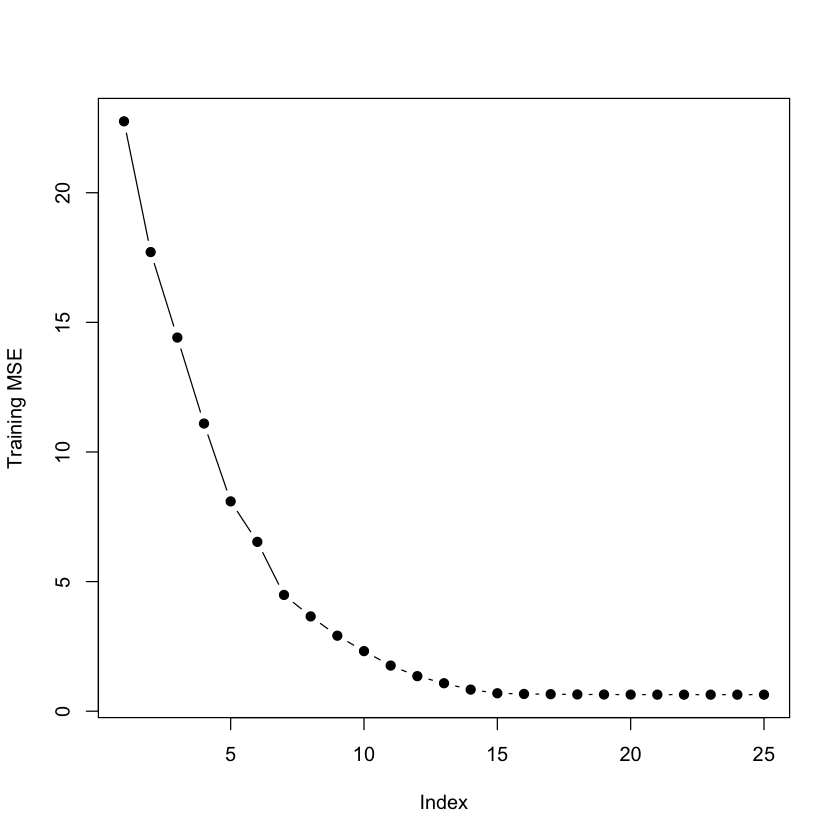

In [23]:
plot(val.errors, ylab = "Training MSE", pch = 19, type = "b")

In [10]:
which.min(val.errors)

[1] 24

In [20]:
val.errors.test <-  rep(NA, p)
for (i in 1:p) {
  coefs <-  coef(regfit.full, id = i)
  pred <-  as.matrix(x.test[, x_cols %in% names(coefs)]) %*% 
    coefs[names(coefs) %in% x_cols]
  val.errors.test[i] <-  mean((y.test - pred)^2)
}

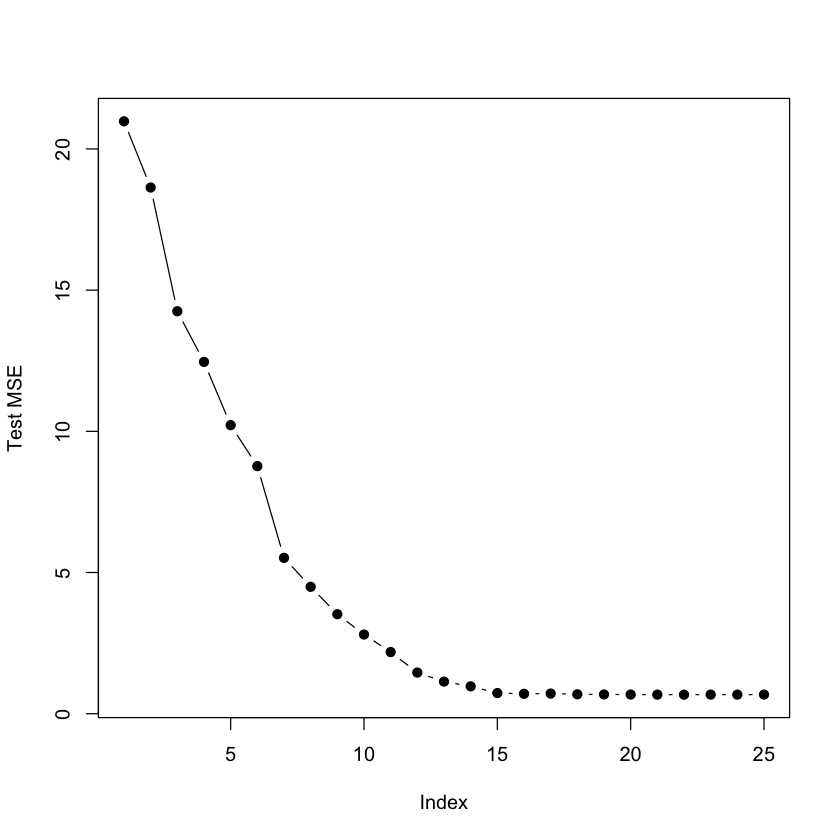

In [21]:
plot(val.errors.test, ylab = "Test MSE", pch = 19, type = "b")

In [14]:
#1d)
which.min(val.errors.test)

[1] 22

The MSE is the lowest for 22
The model with 22 variables results in a model with a minimum test set MSE.

In [15]:
#1e)
coef(regfit.full, which.min(val.errors.test))

(Intercept)         x.1         x.3         x.4         x.5         x.6 
-0.20929180 -0.01742093 -0.03692712  1.50015765  1.57587126 -0.90007961 
        x.7         x.8         x.9        x.10        x.11        x.13 
 0.09631430  0.78412742  0.05163006  1.64185132 -0.75460908  2.14755604 
       x.14        x.15        x.16        x.17        x.19        x.20 
-2.40574971  0.87713926  1.81341807  0.48591648 -0.56046984  1.39773301 
       x.21        x.22        x.23        x.24        x.25 
 0.68372452  0.10397191 -0.17041902 -0.37256539  0.04546209

The best model caught all zeroed out coefficients.

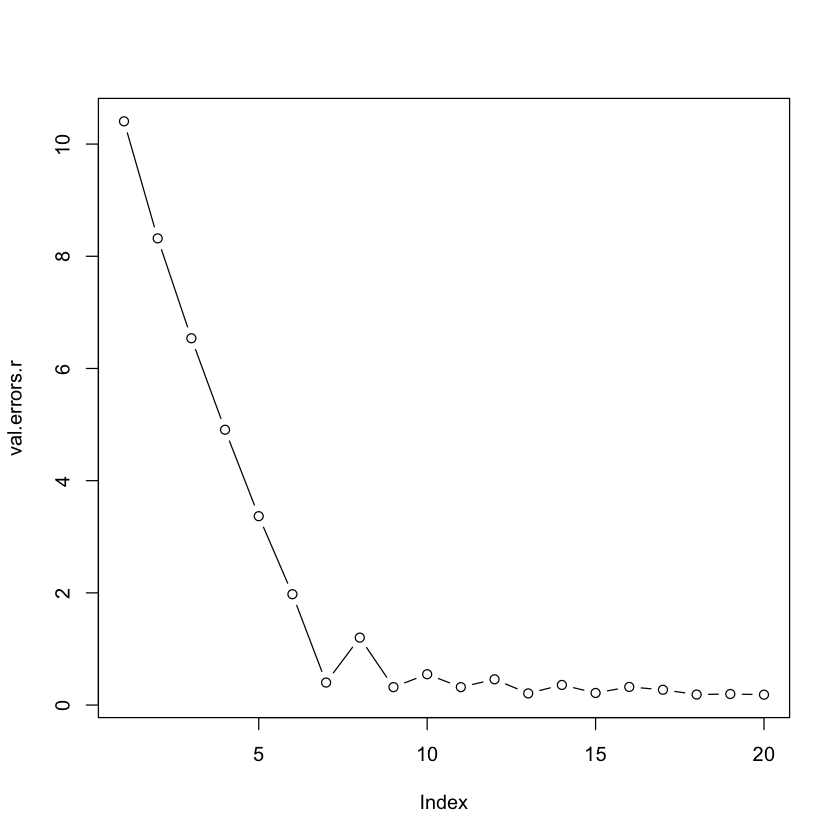

In [16]:
#1e)
val.errors.r=rep(NA,20)
x.columns <- colnames(x, do.NULL = FALSE, prefix="x.")
for(i in 1:20){
 coefi=coef(regfit.full,id=i)
 val.errors.r[i]=sqrt(sum((beta[x.columns %in% names(coefi)] - coefi[names(coefi) %in% x.columns])^2) + sum(beta[!(x.columns %in% names(coefi))])^2)
}
plot(val.errors.r, type='b')

In [17]:
which.min(val.errors.r)

[1] 20

The model with the lowest test MSE is different from the model with the estimated coefficients closest to the true coefficients, which means that the lower test MSE doesn't necessarily mean that the coefficients are a closer fit.